In [3]:
import numpy as np

import pandas as pd

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

**1. Nhập dữ liệu và thống kê những thông tin cơ bản của các thuộc tính.**

In [8]:
print("Huỳnh Thị Trúc Lam - 6351071040")
df = pd.read_csv("bank-full.csv", sep=";")
df.head()


Huỳnh Thị Trúc Lam - 6351071040


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
print("Huỳnh Thị Trúc Lam - 6351071040")
df.info()

Huỳnh Thị Trúc Lam - 6351071040
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
print("Huỳnh Thị Trúc Lam - 6351071040")
df.describe()

Huỳnh Thị Trúc Lam - 6351071040


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**2. Liệt kê danh sách 5 thuộc tính có số lượng giá trị rỗng nhiều nhất.**

In [11]:
print("Huỳnh Thị Trúc Lam - 6351071040")

total = df.isnull().sum().sort_values(ascending=False)
percent_1= df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

Huỳnh Thị Trúc Lam - 6351071040


,Total,Percent
age,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0


**3. Vẽ biểu đồ khảo sát sự liên quan giữa tuổi (age) và việc có gửi tiền (y), đồng thời xem tình trạng hôn nhân (marital) ảnh hưởng thế nào đến – khả năng gửi tiền(deposit) và đưa ra nhận xét.**

Huỳnh Thị Trúc Lam - 6351071040


Text(0.5, 1.0, 'Single')

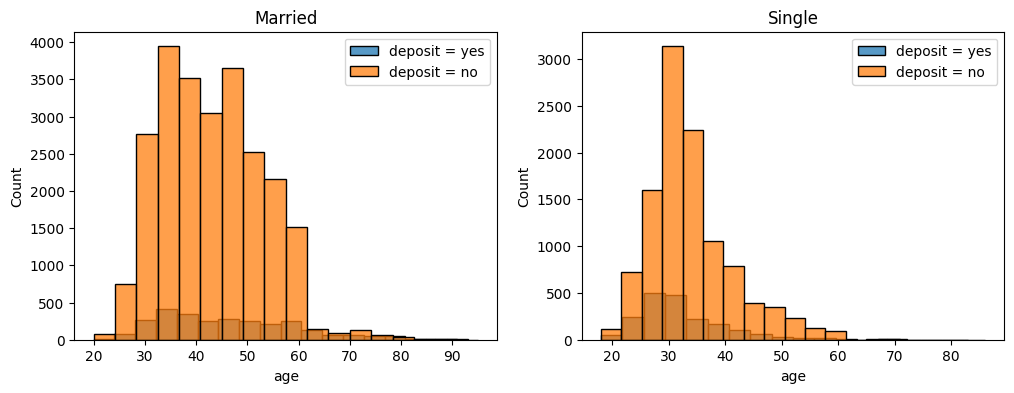

In [13]:
print("Huỳnh Thị Trúc Lam - 6351071040")

yes = 'deposit = yes'
no = 'deposit = no'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Chia nhóm theo marital: married / single (ví dụ)
married = df[df['marital'] == 'married']
single = df[df['marital'] == 'single']

# Nhóm 1: married
ax = sns.histplot(married[married['y'] == 'yes'].age.dropna(),
                  bins=18, label=yes, ax=axes[0], kde=False)
ax = sns.histplot(married[married['y'] == 'no'].age.dropna(),
                  bins=18, label=no, ax=axes[0], kde=False)
ax.legend()
ax.set_title('Married')

# Nhóm 2: single
ax = sns.histplot(single[single['y'] == 'yes'].age.dropna(),
                  bins=18, label=yes, ax=axes[1], kde=False)
ax = sns.histplot(single[single['y'] == 'no'].age.dropna(),
                  bins=18, label=no, ax=axes[1], kde=False)
ax.legend()
ax.set_title('Single')


**4. Vẽ biểu đồ khảo sát sự liên quan giữa trình độ học vấn (education) và số dư tài khoản (balance), phân biệt theo tình trạng hôn nhân (marital), đồng thời phân loại theo deposit = yes/no (y).**

Huỳnh Thị Trúc Lam - 6351071040


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


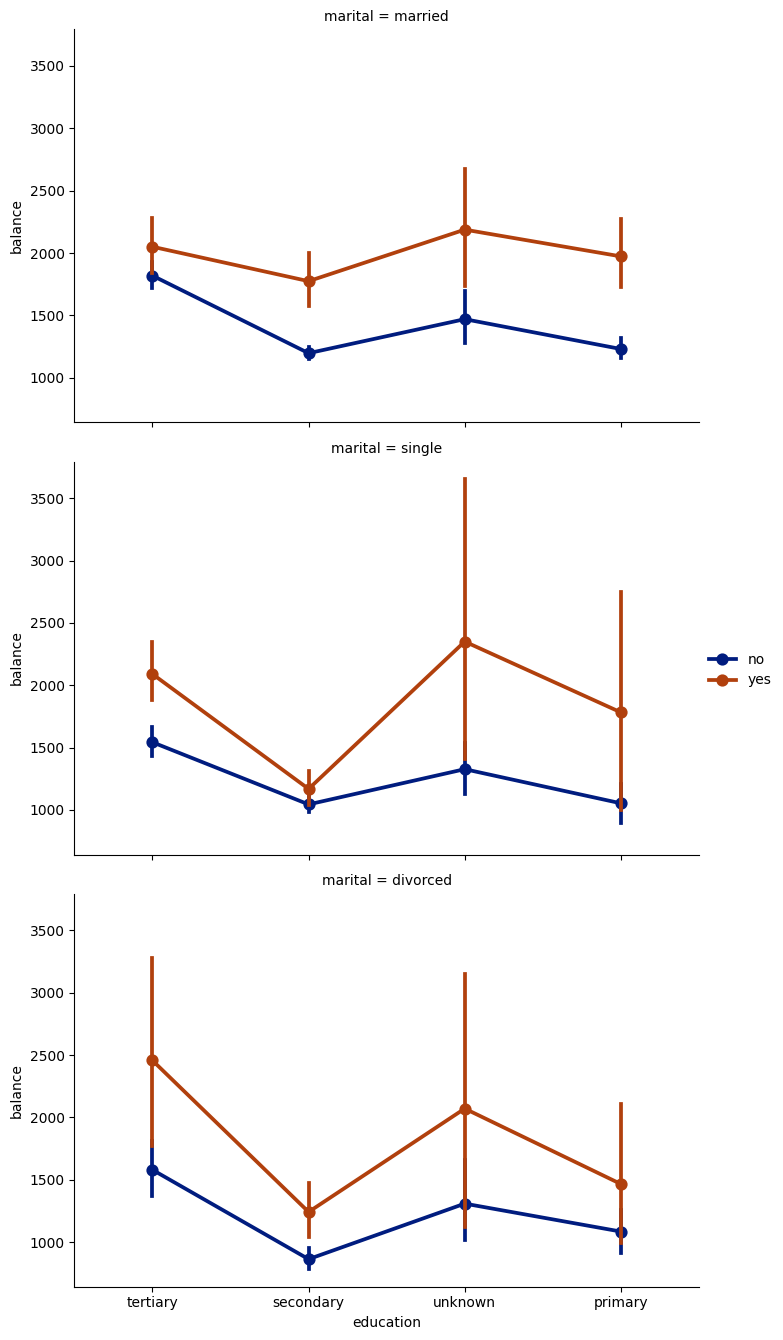

In [17]:
print("Huỳnh Thị Trúc Lam - 6351071040")

FaceGrid = sns.FacetGrid(df, row='marital', height=4.5, aspect=1.6)

FaceGrid.map(
    sns.pointplot,
    'education', 'balance', 'y',
    palette='dark',
    hue_order=['no', 'yes']
)

FaceGrid.add_legend()

Huỳnh Thị Trúc Lam - 6351071040


<Axes: xlabel='education', ylabel='duration'>

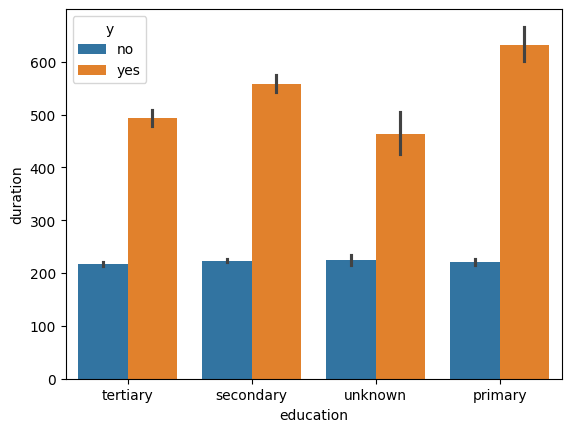

In [19]:
print("Huỳnh Thị Trúc Lam - 6351071040")

sns.barplot(
    x='education',
    y='duration',
    hue='y',
    data=df,
    estimator=np.mean,
)


Huỳnh Thị Trúc Lam - 6351071040


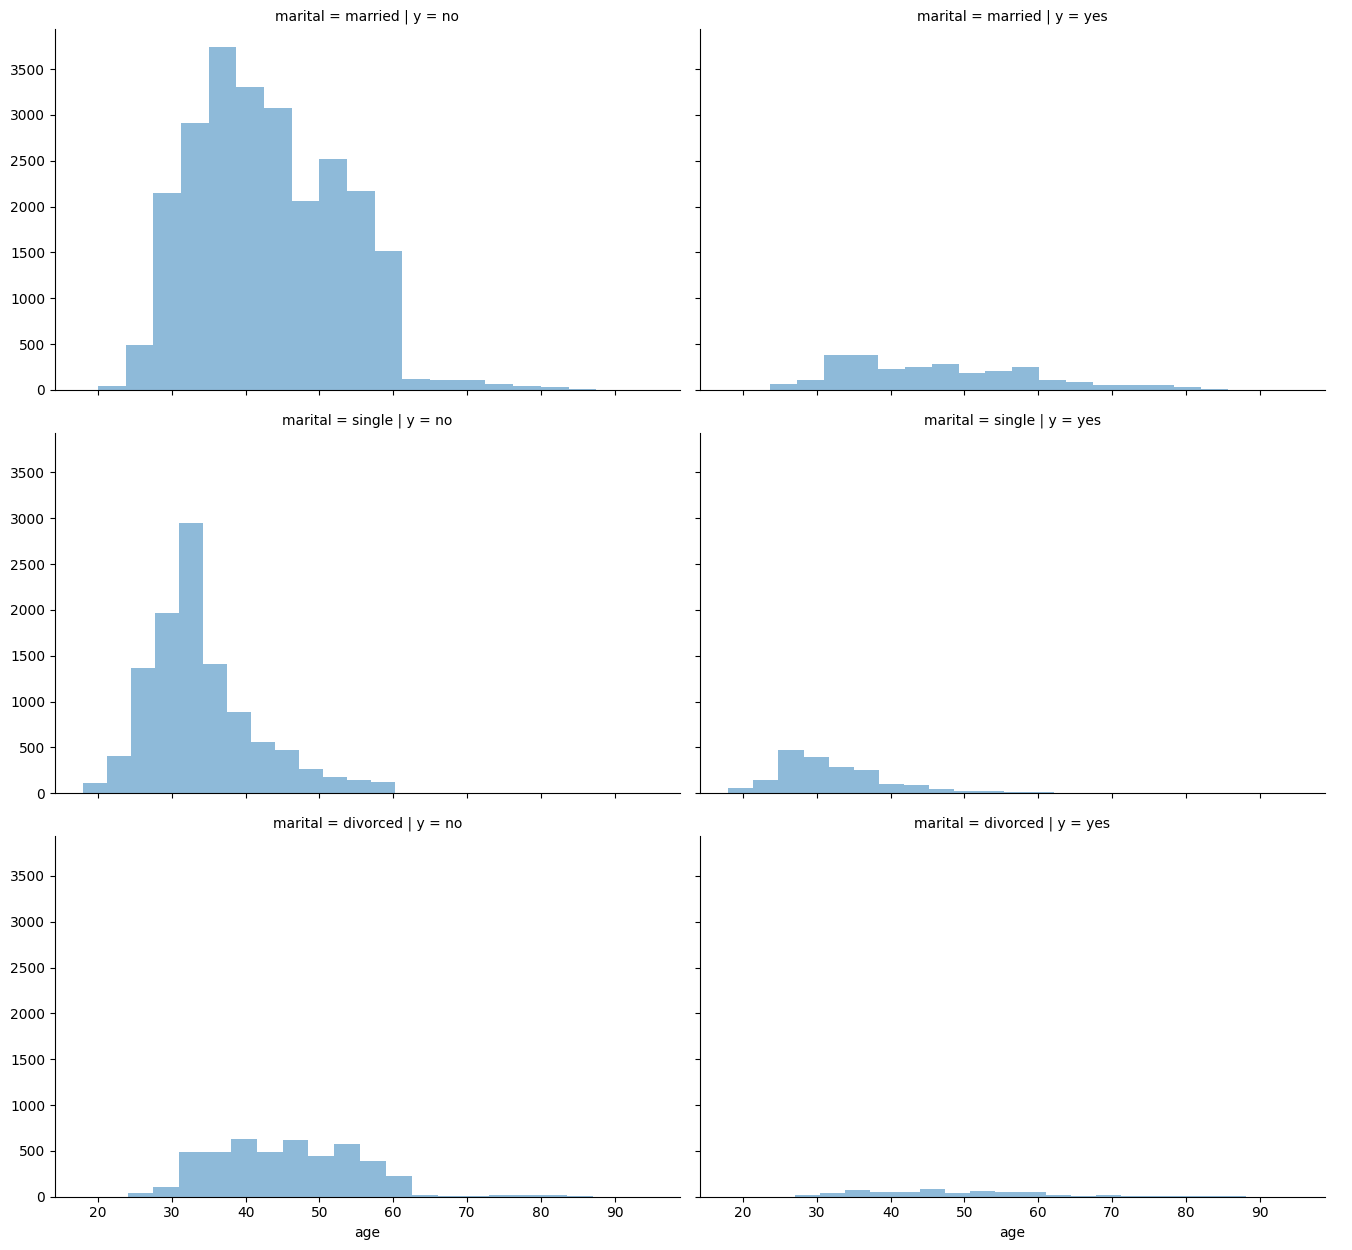

In [20]:
print("Huỳnh Thị Trúc Lam - 6351071040")

grid = sns.FacetGrid(df, row='marital', col='y', height=4.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend()

**6. Tiền xử lý các thuộc tính thiếu dữ liệu và xóa bỏ các thuộc tính không cần thiết.**

In [30]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

# Check if 'cabin' column exists before processing
if 'cabin' in df.columns:
  for dataset_alias in [df]: # Use a different alias to avoid confusion
    dataset_alias['cabin'] = dataset_alias['cabin'].fillna("U0")
    dataset_alias['deck'] = dataset_alias['cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset_alias['deck'] = dataset_alias['deck'].map(deck)
    dataset_alias['deck'] = dataset_alias['deck'].fillna(0)
    dataset_alias['deck'] = dataset_alias['deck'].astype(int)

  df = df.drop(['cabin'], axis=1)
else:
  print("Huỳnh Thị Trúc Lam - 6351071040: 'cabin' column not found, skipping processing and dropping.")


Huỳnh Thị Trúc Lam - 6351071040: 'cabin' column not found, skipping processing and dropping.
